In [2]:
# imports
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyart
from datetime import timedelta

import cmweather
import pandas as pd
import glob

from bokeh.models.formatters import DatetimeTickFormatter
import hvplot.xarray
import holoviews as hv
hv.extension("bokeh")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
# Set your username and token here!
username = 'jeissner'
token = '196301151e10a63'

# COMBLE ARSCL datastream 
datastream = 'anxarsclkazr1kolliasM1.c1'

startdate = '2020-03-01'
enddate = '2020-03-31'

# Read in data
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

ds_arscl = act.io.read_arm_netcdf(result)

ds_arscl


[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200305.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200304.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200306.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200307.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200328.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200301.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200302.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200303.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200324.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200326.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200309.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200321.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200320.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200323.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200318.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200331.000000.nc
[DOWNLOADING] anxarsclkazr1kolliasM1.c1.20200319.000000.

<xarray.Dataset> Size: 34GB
Dimensions:                               (time: 669600, height: 596,
                                           layer: 10, radar_mode: 4)
Coordinates:
  * time                                  (time) datetime64[ns] 5MB 2020-03-0...
  * layer                                 (layer) int32 40B 0 1 2 3 4 5 6 7 8 9
  * height                                (height) float32 2kB 160.0 ... 1.80...
  * radar_mode                            (radar_mode) |S2 8B b'hi' ... b'pr'
Data variables: (12/33)
    base_time                             (time) datetime64[ns] 5MB 2020-03-0...
    time_offset                           (time) datetime64[ns] 5MB 2020-03-0...
    reflectivity_best_estimate            (time, height) float32 2GB dask.array<chunksize=(901, 596), meta=np.ndarray>
    qc_reflectivity_best_estimate         (time, height) int32 2GB dask.array<chunksize=(901, 596), meta=np.ndarray>
    reflectivity                          (time, height) float32 2GB dask.array<chunksize=(901, 596), meta=np.ndarray>
    qc_reflectivity                       (time, height) int32 2GB dask.array<chunksize=(901, 596), meta=np.ndarray>
    ...                                    ...
    minimum_detectable_reflectivity_flag  (time, height) float32 2GB dask.array<chunksize=(901, 596), meta=np.ndarray>
    reflectivity_saturation_flag          (time, height) float32 2GB dask.array<chunksize=(901, 596), meta=np.ndarray>
    instrument_availability_flag          (time) int16 1MB dask.array<chunksize=(900,), meta=np.ndarray>
    lat                                   (time) float32 3MB 69.14 ... 69.14
    lon                                   (time) float32 3MB 15.68 ... 15.68
    alt                                   (time) float32 3MB 2.0 2.0 ... 2.0 2.0
Attributes: (12/22)
    command_line:                     idl -R -n kazrcfrarscl -n kazrcfrarsclc...
    Conventions:                      ARM-1.2
    process_version:                  vap-kazrcfrarscl-1.6-4.el7
    dod_version:                      arsclkazr1kollias-c1-4.0
    site_id:                          anx
    platform_id:                      arsclkazr1kollias
    ...                               ...
    doi:                              10.5439/1228768
    history:                          created by user malynn on machine node1...
    _file_dates:                      ['20200301', '20200302', '20200303', '2...
    _file_times:                      ['000000', '000000', '000000', '000000'...
    _datastream:                      anxarsclkazr1kolliasM1.c1
    _arm_standards_flag:              1

In [6]:
%store -r

In [9]:
time_s[0]
vdates = []
for time in time_s:
    time = str(time)
    dates = time[0:10]
    vdates.append(dates)

    ds2 = ds_arscl.sel(time=slice(dates))
    
    ref = ds2.reflectivity_best_estimate
    ref_lowest_5000m = ref.sel(height=slice(0., 5000))
    ref_lowest_5000m.plot(x='time',y='height',
                                   cmap='ChaseSpectral',
                                   vmin=-40,
                                   vmax=20)
    plt.show()



TypeError: No numeric data to plot.

In [12]:
ds2

<xarray.Dataset> Size: 2kB
Dimensions:                               (time: 0, height: 596, layer: 10,
                                           radar_mode: 4)
Coordinates:
  * time                                  (time) datetime64[ns] 0B 
  * layer                                 (layer) int32 40B 0 1 2 3 4 5 6 7 8 9
  * height                                (height) float32 2kB 160.0 ... 1.80...
  * radar_mode                            (radar_mode) |S2 8B b'hi' ... b'pr'
Data variables: (12/33)
    base_time                             (time) datetime64[ns] 0B 
    time_offset                           (time) datetime64[ns] 0B 
    reflectivity_best_estimate            (time, height) float32 0B dask.array<chunksize=(0, 596), meta=np.ndarray>
    qc_reflectivity_best_estimate         (time, height) int32 0B dask.array<chunksize=(0, 596), meta=np.ndarray>
    reflectivity                          (time, height) float32 0B dask.array<chunksize=(0, 596), meta=np.ndarray>
    qc_reflectivity                       (time, height) int32 0B dask.array<chunksize=(0, 596), meta=np.ndarray>
    ...                                    ...
    minimum_detectable_reflectivity_flag  (time, height) float32 0B dask.array<chunksize=(0, 596), meta=np.ndarray>
    reflectivity_saturation_flag          (time, height) float32 0B dask.array<chunksize=(0, 596), meta=np.ndarray>
    instrument_availability_flag          (time) int16 0B dask.array<chunksize=(0,), meta=np.ndarray>
    lat                                   (time) float32 0B 
    lon                                   (time) float32 0B 
    alt                                   (time) float32 0B 
Attributes: (12/22)
    command_line:                     idl -R -n kazrcfrarscl -n kazrcfrarsclc...
    Conventions:                      ARM-1.2
    process_version:                  vap-kazrcfrarscl-1.6-4.el7
    dod_version:                      arsclkazr1kollias-c1-4.0
    site_id:                          anx
    platform_id:                      arsclkazr1kollias
    ...                               ...
    doi:                              10.5439/1228768
    history:                          created by user malynn on machine node1...
    _file_dates:                      ['20200301', '20200302', '20200303', '2...
    _file_times:                      ['000000', '000000', '000000', '000000'...
    _datastream:                      anxarsclkazr1kolliasM1.c1
    _arm_standards_flag:              1

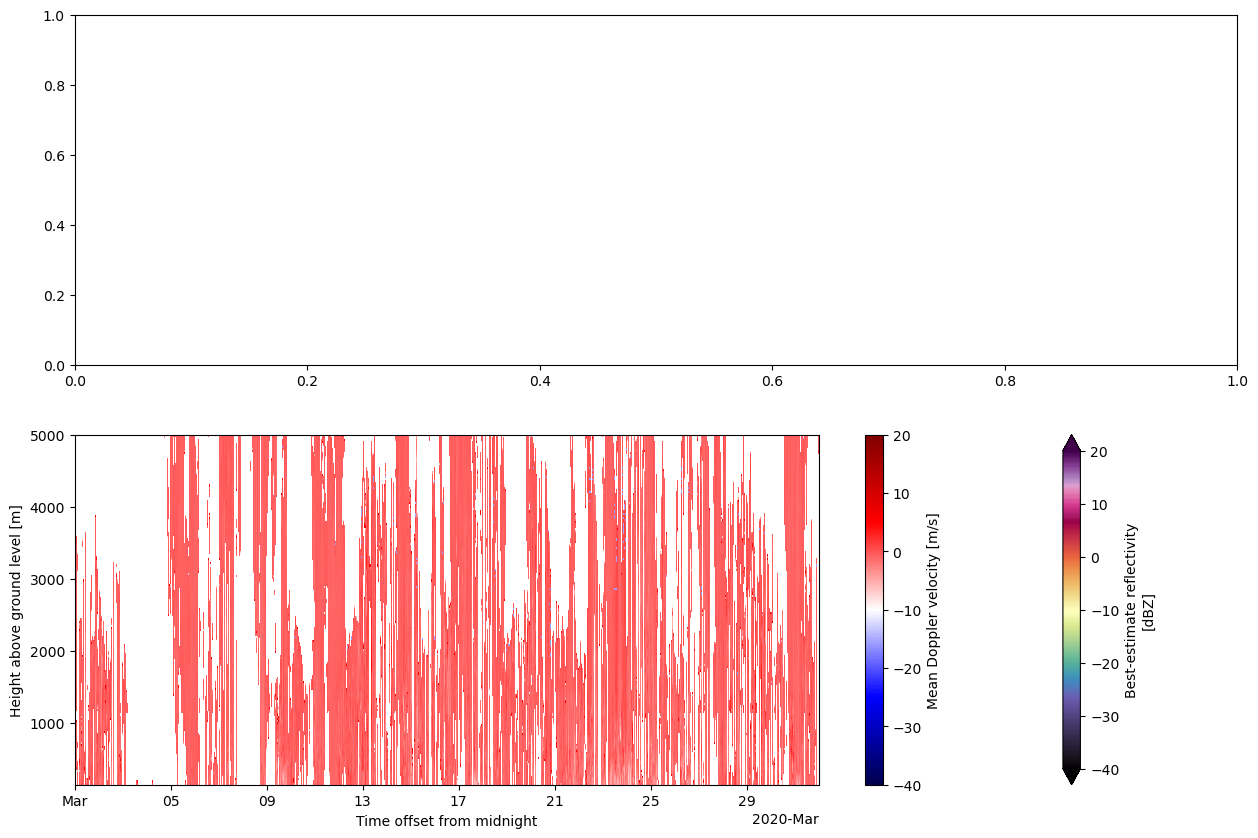

In [11]:
# plot reflectivity
variable='reflectivity'
#variable='reflectivity_best_estimate'
# Let's filter out test 5 using ACT.  Yes, it's that simple!
ds_arscl.qcfilter.datafilter(variable, rm_tests=[1, 2], del_qc_var=False)

# There are other ways we can filter data out as well.  Using the
# rm_assessments will filter out by all Bad/Suspect tests that are failing
# ds.qcfilter.datafilter(variable, rm_assessments=['Bad', 'Suspect'], del_qc_var=False)

# Let's check out the attributes of the variable
# Whenever data are filtered out using the datafilter function
# a comment will be added to the variable history for provenance purposes
#print(ds_arscl[variable].attrs)

# And plot it all again!
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds_arscl, figsize=(15, 10), subplot_shape=(2,))

# Plot up the variable in the first plot
#display.plot(variable, subplot_index=(0,))

ref = ds_arscl.reflectivity_best_estimate
vel = ds_arscl.mean_doppler_velocity
ref_lowest_5000m = ref.sel(height=slice(0., 5000))
vel_lowest_5000m = vel.sel(height=slice(0., 5000))
ref_lowest_5000m.plot(x='time',y='height',
                                   cmap='ChaseSpectral',
                                   vmin=-40,
                                   vmax=20)
vel_lowest_5000m.plot(x='time',y='height',
                                   cmap='seismic',
                                   vmin=-40,
                                   vmax=20)

#ref_lowest_5000m.hvplot(x='time',
#                                     y='height',
#                                     cmap='ChaseSpectral',
#                                     clim=(-40, 20),
#                                     rasterize=True)

# Plot cloud base height
#display.plot('cloud_base_best_estimate', subplot_index=(0,))

# Plot velocities 
#display.plot('mean_doppler_velocity', subplot_index=(1,))
plt.show()

In [90]:
formatter = DatetimeTickFormatter(hours="%d %b %Y \n %H:%M UTC")
reflectivity_plot = ds_arscl.reflectivity.sel(height=slice(0, 7000)).hvplot(x='time', y='height', cmap='Spectral_r', xformatter=formatter, clim=(-40, 20), rasterize=True, clabel='Reflectivity (dBZ)')
velocity_plot = ds_arscl.mean_doppler_velocity.sel(height=slice(0, 7000)).hvplot(x='time', y='height', cmap='seismic', xformatter=formatter, clim=(-5, 5), rasterize=True, clabel='Mean Doppler Velocity (m/s)')

reflectivity_plot + velocity_plot

:Layout
   .DynamicMap.I  :DynamicMap   []
      :Image   [time,height]   (reflectivity)
   .DynamicMap.II :DynamicMap   []
      :Image   [time,height]   (mean_doppler_velocity)

In [91]:
# NSA datastream
datastream = 'nsaarsclkazr1kolliasC1.c0'
startdate = '2016-11-05'
enddate = '2016-11-06'

# Read in data
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

ds_arscl_nsa = act.io.read_arm_netcdf(result)

ds_arscl_nsa

[DOWNLOADING] nsaarsclkazr1kolliasC1.c0.20161106.000000.nc
[DOWNLOADING] nsaarsclkazr1kolliasC1.c0.20161105.000000.nc

If you use these data to prepare a publication, please cite:

Johnson, K., Giangrande, S., & Toto, T. Active Remote Sensing of CLouds (ARSCL)
product using Ka-band ARM Zenith Radars (ARSCLKAZR1KOLLIAS). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1393437



<xarray.Dataset> Size: 2GB
Dimensions:                               (time: 43200, height: 596, layer: 10,
                                           radar_mode: 4)
Coordinates:
  * time                                  (time) datetime64[ns] 346kB 2016-11...
  * layer                                 (layer) int32 40B 0 1 2 3 4 5 6 7 8 9
  * height                                (height) float32 2kB 160.0 ... 1.80...
  * radar_mode                            (radar_mode) |S2 8B b'hi' ... b'pr'
Data variables: (12/33)
    base_time                             (time) datetime64[ns] 346kB 2016-11...
    time_offset                           (time) datetime64[ns] 346kB 2016-11...
    reflectivity_best_estimate            (time, height) float32 103MB dask.array<chunksize=(901, 596), meta=np.ndarray>
    qc_reflectivity_best_estimate         (time, height) int32 103MB dask.array<chunksize=(901, 596), meta=np.ndarray>
    reflectivity                          (time, height) float32 103MB dask.array<chunksize=(901, 596), meta=np.ndarray>
    qc_reflectivity                       (time, height) int32 103MB dask.array<chunksize=(901, 596), meta=np.ndarray>
    ...                                    ...
    minimum_detectable_reflectivity_flag  (time, height) float32 103MB dask.array<chunksize=(901, 596), meta=np.ndarray>
    reflectivity_saturation_flag          (time, height) float32 103MB dask.array<chunksize=(901, 596), meta=np.ndarray>
    instrument_availability_flag          (time) int16 86kB dask.array<chunksize=(1,), meta=np.ndarray>
    lat                                   (time) float32 173kB 71.32 ... 71.32
    lon                                   (time) float32 173kB -156.6 ... -156.6
    alt                                   (time) float32 173kB 8.0 8.0 ... 8.0
Attributes: (12/23)
    command_line:                     idl -R -n kazrarsclc0 -s nsa -f C1 -b 2...
    Conventions:                      ARM-1.2
    process_version:                  vap-kazrarscl-1.0.0-devel
    dod_version:                      arsclkazr1kollias-c0-1.0
    site_id:                          nsa
    platform_id:                      arsclkazr1kollias
    ...                               ...
    doi:                              10.5439/1393437
    history:                          created by user ttoto on machine talc.d...
    _file_dates:                      ['20161105', '20161106']
    _file_times:                      ['000000', '000000']
    _datastream:                      nsaarsclkazr1kolliasC1.c0
    _arm_standards_flag:              1

In [85]:
reflectivity_plot = ds_arscl_nsa.reflectivity.sel(height=slice(0, 3000)).hvplot(x='time', y='height', cmap='Spectral_r', xformatter=formatter, clim=(-40, 20), rasterize=True, clabel='Reflectivity (dBZ)')
velocity_plot = ds_arscl_nsa.mean_doppler_velocity.sel(height=slice(0, 3000)).hvplot(x='time', y='height', cmap='seismic', xformatter=formatter, clim=(-5, 5), rasterize=True, clabel='Mean Doppler Velocity (m/s)')
specwidth_plot = ds_arscl_nsa.spectral_width.sel(height=slice(0, 3000)).hvplot(x='time', y='height', cmap='seismic', xformatter=formatter, clim=(-1, 1), rasterize=True, clabel='Spectral Width (m/s)')

reflectivity_plot + velocity_plot + specwidth_plot

:Layout
   .DynamicMap.I   :DynamicMap   []
      :Image   [time,height]   (reflectivity)
   .DynamicMap.II  :DynamicMap   []
      :Image   [time,height]   (mean_doppler_velocity)
   .DynamicMap.III :DynamicMap   []
      :Image   [time,height]   (spectral_width)

In [93]:
# COMBLE PBL heights
datastream = 'anxpblhtsonde1mcfarlM1.c1'
datastream2 = 'nsapblhtsonde1mcfarlC1.c1'

startdate = '2020-03-01'
enddate = '2020-03-31'

startdate2 = '2016-11-05'
enddate2 = '2016-11-06'

# Read in data
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result2 = act.discovery.download_arm_data(username, token, datastream2, startdate2, enddate2)

ds_pbl_comble = act.io.read_arm_netcdf(result)
ds_pbl_nsa = act.io.read_arm_netcdf(result2)

[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200311.052700.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200312.172800.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200321.232600.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200305.052800.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200330.052500.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200313.232200.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200325.172400.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200314.053000.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200322.053100.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200306.172900.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200305.172300.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200326.232600.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200315.112300.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200315.172700.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200313.052700.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.20200301.112300.cdf
[DOWNLOADING] anxpblhtsonde1mcfarlM1.c1.

ValueError: Coordinate variable height_ss is neither monotonically increasing nor monotonically decreasing on all datasets

In [94]:
ds_pbl_nsa

NameError: name 'ds_pbl_nsa' is not defined